In [1]:
%matplotlib inline

from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

import numpy as np

import pandas as pd
from pandas.io.json import json_normalize

import folium
from folium.plugins import TimestampedGeoJson, HeatMapWithTime

pd.set_option('max_colwidth', 500)

In [32]:
columns = ['datetime', 'clock_time', 'object_type', 'uuid', 'itinerary_id', 'from_state', 'to_state', 'details']

data = pd.read_csv('../log.csv', sep=';', header=None, names=columns, parse_dates=['datetime'], converters={'details': lambda v: eval(v)})

print('Raw data:\n')

print(f'Shape: {data.shape}')
print('Columns:')
pprint(list(data.columns.values))

print('\nDetails:\n')
details = json_normalize(data.details)

print(f'Shape: {details.shape}')
print('Columns:')
pprint(list(details.columns.values))


Raw data:

Shape: (85259, 8)
Columns:
['datetime',
 'clock_time',
 'object_type',
 'uuid',
 'itinerary_id',
 'from_state',
 'to_state',
 'details']

Details:

Shape: (85259, 19)
Columns:
['vehicle_id',
 'position.lat',
 'position.lon',
 'pickup.lat',
 'pickup.lon',
 'dropoff.lat',
 'dropoff.lon',
 'itinerary_id',
 'itinerary_created_at',
 'eta',
 'pickup',
 'route_duration',
 'route_distance',
 'actual_duration',
 'actual_distance',
 'destination.lat',
 'destination.lon',
 'stop_reason',
 'dropoff']


In [33]:
data.head(3)

,datetime,clock_time,object_type,uuid,itinerary_id,from_state,to_state,details
0,2020-01-03 11:32:48.219,0,vehicle,db5b5fab8f4d3e27dda1494c73cf256d,None,offline,idling,"{'vehicle_id': 'db5b5fab8f4d3e27dda1494c73cf256d', 'position': {'lat': 52.53484, 'lon': 13.51754}}"
1,2020-01-03 11:32:48.219,0,vehicle,73ab48767734d7c1c7fde805ec99108d,None,offline,idling,"{'vehicle_id': '73ab48767734d7c1c7fde805ec99108d', 'position': {'lat': 52.54108, 'lon': 13.41075}}"
2,2020-01-03 11:32:48.219,0,vehicle,309d6b79965eda32dae445508201e2bd,None,offline,idling,"{'vehicle_id': '309d6b79965eda32dae445508201e2bd', 'position': {'lat': 52.49141, 'lon': 13.28434}}"


In [34]:
details.head(3)

,vehicle_id,position.lat,position.lon,pickup.lat,pickup.lon,dropoff.lat,dropoff.lon,itinerary_id,itinerary_created_at,eta,pickup,route_duration,route_distance,actual_duration,actual_distance,destination.lat,destination.lon,stop_reason,dropoff
0,db5b5fab8f4d3e27dda1494c73cf256d,52.53484,13.51754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73ab48767734d7c1c7fde805ec99108d,52.54108,13.41075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,309d6b79965eda32dae445508201e2bd,52.49141,13.28434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
vals = details[(data.object_type == 'vehicle') & (data.from_state == 'offline')]
vals = vals[['position.lat', 'position.lon']]

m = folium.Map(location=[52.5223924, 13.4106361])

for pos in vals.values:
    folium.Circle(
        radius=100,
        location=[pos[0], pos[1]],
        color='green',
        fill=False,
    ).add_to(m)
    
m

In [36]:
created = details[(data.object_type == 'booking') & (data.from_state == 'created')]
created = created[['position.lat', 'position.lon']]

expired = details[(data.object_type == 'booking') & (data.to_state == 'expired')]
expired = expired[['position.lat', 'position.lon']]

pickup = details[(data.object_type == 'booking') & (data.to_state == 'pickup')]
pickup = pickup[['position.lat', 'position.lon']]

m = folium.Map(location=[52.5223924, 13.4106361])

for pos in created.values:
    folium.Circle(
        radius=25,
        location=[pos[0], pos[1]],
        color='blue',
        fill=True,
    ).add_to(m)
    
for pos in pickup.values:
    folium.Circle(
        radius=25,
        location=[pos[0], pos[1]],
        color='green',
        fill=True,
    ).add_to(m)
    
for pos in expired.values:
    folium.Circle(
        radius=25,
        location=[pos[0], pos[1]],
        color='red',
        fill=True,
    ).add_to(m)
    
m

In [37]:
itinerary_id = data.itinerary_id.unique()[3]

data.itinerary_id.unique()[:3]

array(['None', 'a3f633d93ecf417f85f62742935d43bf',
       '9d754d4ac156464387c172cbf8f247ec'], dtype=object)

In [515]:
data[(data.itinerary_id == itinerary_id) & (data.object_type == 'vehicle')]

,datetime,clock_time,object_type,uuid,itinerary_id,from_state,to_state,details
172,2020-01-03 11:06:53.579,26,vehicle,f2650b71959de095859dcac8b0f3e5fd,049c05dbea584e13b280e70598825daf,idling,moving_to,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26, 'eta': 6, 'pickup': 'c0d2f3a2f7d558cf865bd310d142c31c', 'position': {'lat': 52.50412, 'lon': 13.33124}, 'destination': {'lat': 52.50196, 'lon': 13.33416}, 'route_duration': 11, 'route_distance': 0.6948, 'actual_duration': 0, 'actual_distance': 0.0}"
209,2020-01-03 11:06:53.697,37,vehicle,f2650b71959de095859dcac8b0f3e5fd,049c05dbea584e13b280e70598825daf,moving_to,idling,"{'stop_reason': 'arrived_at_destination', 'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26, 'eta': 6, 'pickup': 'c0d2f3a2f7d558cf865bd310d142c31c', 'position': {'lat': 52.50196, 'lon': 13.33416}, 'destination': {'lat': 52.50196, 'lon': 13.33416}, 'route_duration': 11, 'route_distance': 0.6948, 'actual_duration': 11, 'actual_distance': 0.6948}"
213,2020-01-03 11:06:53.712,37,vehicle,f2650b71959de095859dcac8b0f3e5fd,049c05dbea584e13b280e70598825daf,idling,moving_to,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26, 'eta': None, 'dropoff': 'c0d2f3a2f7d558cf865bd310d142c31c', 'position': {'lat': 52.50196, 'lon': 13.33416}, 'destination': {'lat': 52.52322, 'lon': 13.40337}, 'route_duration': 72, 'route_distance': 6.3406, 'actual_duration': 0, 'actual_distance': 0.0}"
395,2020-01-03 11:06:54.217,109,vehicle,f2650b71959de095859dcac8b0f3e5fd,049c05dbea584e13b280e70598825daf,moving_to,idling,"{'stop_reason': 'arrived_at_destination', 'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26, 'eta': None, 'dropoff': 'c0d2f3a2f7d558cf865bd310d142c31c', 'position': {'lat': 52.52322, 'lon': 13.40337}, 'destination': {'lat': 52.52322, 'lon': 13.40337}, 'route_duration': 72, 'route_distance': 6.3406, 'actual_duration': 72, 'actual_distance': 6.3406}"


In [516]:
total_distance = details[~details.stop_reason.isna()].actual_distance.sum()

print(f'Total travel distance: {total_distance}')

Total travel distance: 4991.327925164906


In [517]:
data[(data.itinerary_id == itinerary_id) & (data.object_type == 'booking')]

,datetime,clock_time,object_type,uuid,itinerary_id,from_state,to_state,details
173,2020-01-03 11:06:53.579,26,booking,c0d2f3a2f7d558cf865bd310d142c31c,049c05dbea584e13b280e70598825daf,pending,matched,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26}"
174,2020-01-03 11:06:53.579,26,booking,c0d2f3a2f7d558cf865bd310d142c31c,049c05dbea584e13b280e70598825daf,matched,waiting_pickup,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26}"
212,2020-01-03 11:06:53.706,37,booking,c0d2f3a2f7d558cf865bd310d142c31c,049c05dbea584e13b280e70598825daf,waiting_pickup,pickup,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26}"
214,2020-01-03 11:06:53.712,37,booking,c0d2f3a2f7d558cf865bd310d142c31c,049c05dbea584e13b280e70598825daf,pickup,waiting_dropoff,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26}"
396,2020-01-03 11:06:54.222,109,booking,c0d2f3a2f7d558cf865bd310d142c31c,049c05dbea584e13b280e70598825daf,waiting_dropoff,dropoff,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26}"
397,2020-01-03 11:06:54.223,109,booking,c0d2f3a2f7d558cf865bd310d142c31c,049c05dbea584e13b280e70598825daf,dropoff,complete,"{'vehicle_id': 'f2650b71959de095859dcac8b0f3e5fd', 'itinerary_id': '049c05dbea584e13b280e70598825daf', 'itinerary_created_at': 26}"


In [518]:
# 1. pending -> pickup
# 2. pending -> matched -> pickup

def calc_waiting_time(item):
    vals = dict(item[['to_state', 'clock_time']].values)
    if 'pickup' not in vals:
        return None
    return vals['pickup'] - vals['pending']

waiting_times = data[data.object_type == 'booking'].groupby('uuid').apply(calc_waiting_time)

print(f'Average waiting time (clock time): {waiting_times[~waiting_times.isna()].mean():.2f}')

Average waiting time (clock time): 19.16


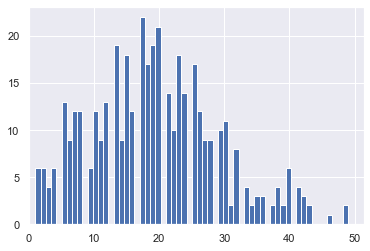

In [519]:
waiting_times[~waiting_times.isna()].hist(bins=60);
plt.xlim(0);

In [520]:
pickups = data[(data.object_type == 'booking') & (data.to_state == 'pickup')].shape[0]
expired = data[(data.object_type == 'booking') & (data.to_state == 'expired')].shape[0]

total = pickups + expired
print('Total bookings:', total)
print(f'Pickup rate: {pickups/total*100:.1f}%')

Total bookings: 890
Pickup rate: 46.9%


Fleet utilization: 20.75%
Average utilization: 28.03%


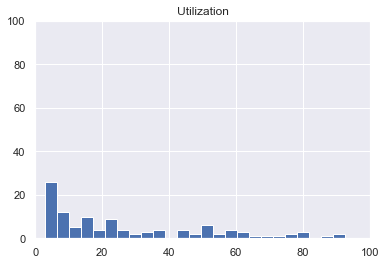

In [521]:
num_vehicles = data[data.object_type == 'vehicle'].uuid.unique().shape[0]
num_steps = data.clock_time.max() - data.clock_time.min()

idx = (data.object_type == 'vehicle') & (~details.stop_reason.isna())

total_duration = details[idx].groupby('vehicle_id')['actual_duration'].sum() 

utilization = total_duration / num_steps * 100

fleet_utilization = total_duration.sum() / (num_steps * num_vehicles) * 100

print(f'Fleet utilization: {fleet_utilization:.2f}%')
print(f'Average utilization: {utilization.mean():.2f}%')

utilization.hist(bins=25);
plt.title('Utilization')
plt.xlim(0, 100);
plt.ylim(0, 100);

Fleet paid utilization: 15.30%
Average paid utilization: 21.25%


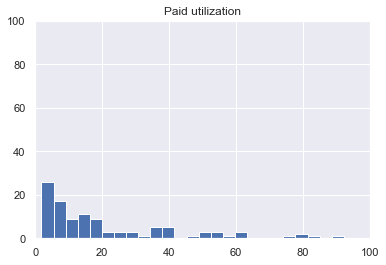

In [522]:
idx = (data.object_type == 'vehicle') & (~details.dropoff.isna()) & (~details.stop_reason.isna())

total_duration = details[idx].groupby('vehicle_id')['actual_duration'].sum() 

utilization = total_duration / num_steps * 100

fleet_utilization = total_duration.sum() / (num_steps * num_vehicles) * 100

print(f'Fleet paid utilization: {fleet_utilization:.2f}%')
print(f'Average paid utilization: {utilization.mean():.2f}%')

utilization.hist(bins=25);
plt.title('Paid utilization')
plt.xlim(0, 100);
plt.ylim(0, 100);

In [523]:
distance = details[(~details.stop_reason.isna()) & (~details.pickup.isna())].actual_distance.sum()
print(f'Empty distance: {distance:.2f}')

Empty distance: 771.06


In [524]:
distance = details[(~details.stop_reason.isna())].actual_distance.sum()
print(f'Total travel distance: {distance:.2f}')

Total travel distance: 4991.33
